In [1]:
import pandas as pd
# Data visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime

## Loading data

In [2]:
df_maldita = pd.read_json('./../data/count_day_maldita.json')
df_google = pd.read_json('./../data/count_day_google.json')
df_tweets = pd.read_json('./../data/count_day_tweets.json')
df_mynews = pd.read_json('./../data/count_day_mynews.json')

In [3]:
df_maldita['date'] = df_maldita['date'].astype('datetime64[ns]') 
df_google['date'] = df_google['date'].astype('datetime64[ns]') 
df_tweets['date'] = df_tweets['date'].astype('datetime64[ns]') 
df_mynews['date'] = df_mynews['date'].astype('datetime64[ns]') 

## Time period

In [4]:
# Getting only from the day we changed the algo
date_change = datetime.datetime.strptime("2022-22-12", '%Y-%d-%m')
df_mynews = df_mynews[df_mynews['date'] >= date_change]
df_google = df_google[df_google['date'] >= date_change]
df_tweets = df_tweets[df_tweets['date'] >= date_change]
df_maldita = df_maldita[df_maldita['date'] >= date_change]

In [5]:
print(f" First day for Maldita: {min(df_maldita['date'])}")
print(f" Last day for Maldita: {max(df_maldita['date'])}")
print(f" Lenght period for Maldita: {max(df_maldita['date']) - min(df_maldita['date']) }")

 First day for Maldita: 2022-12-22 00:00:00
 Last day for Maldita: 2023-02-20 00:00:00
 Lenght period for Maldita: 60 days 00:00:00


In [6]:
print(f" First day for Google: {min(df_google['date'])}")
print(f" Last day for Google: {max(df_google['date'])}")
print(f" Lenght period for Google: {max(df_google['date']) - min(df_google['date']) }")

 First day for Google: 2022-12-22 00:00:00
 Last day for Google: 2023-02-19 00:00:00
 Lenght period for Google: 59 days 00:00:00


In [7]:
print(f" First day for Twitter: {min(df_tweets['date'])}")
print(f" Last day for Twitter: {max(df_tweets['date'])}")
print(f" Lenght period for Twitter: {max(df_tweets['date']) - min(df_tweets['date']) }")

 First day for Twitter: 2022-12-22 00:00:00
 Last day for Twitter: 2023-02-19 00:00:00
 Lenght period for Twitter: 59 days 00:00:00


In [8]:
print(f" First day for MyNews: {min(df_mynews['date'])}")
print(f" Last day for MyNews: {max(df_mynews['date'])}")
print(f" Lenght period for MyNews: {max(df_mynews['date']) - min(df_mynews['date']) }")

 First day for MyNews: 2022-12-22 00:00:00
 Last day for MyNews: 2023-02-06 00:00:00
 Lenght period for MyNews: 46 days 00:00:00


## Average per fact-check

In [9]:
df_tweets[df_tweets['date'] >= date_change].groupby('fact_id').sum('count').mean()

count    1252.407166
dtype: float64

<AxesSubplot: xlabel='count'>

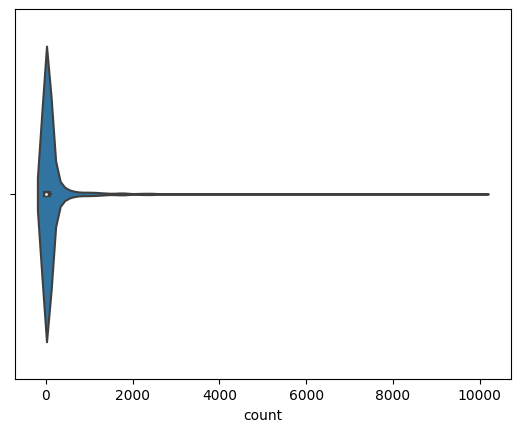

In [10]:
sns.violinplot(x=df_tweets['count'])

In [11]:
df_mynews[df_mynews['date'] >= date_change].groupby('fact_id').sum('count').mean()

count    12.915966
dtype: float64

<AxesSubplot: xlabel='count'>

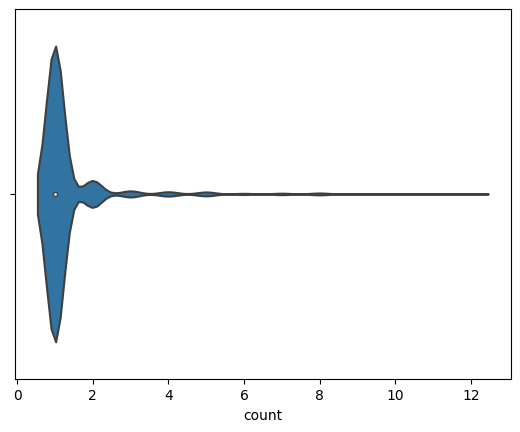

In [12]:
sns.violinplot(x=df_mynews['count'])

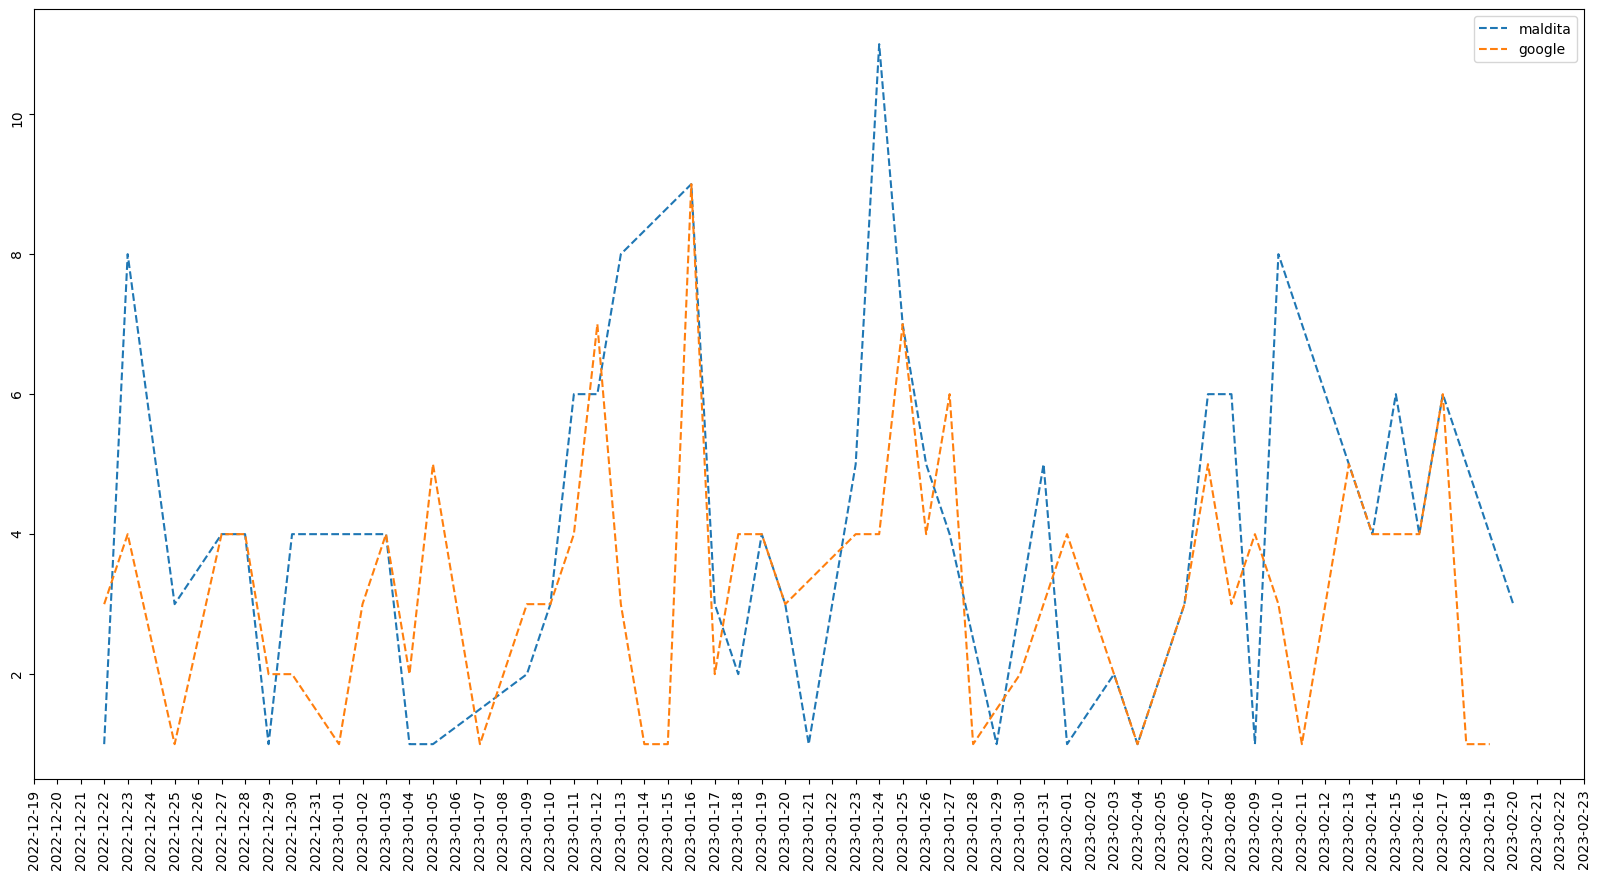

In [13]:
maldita = df_maldita.groupby(df_maldita['date'])['count'].sum()
google = df_google.groupby(df_google['date'])['count'].sum()

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot_date(maldita.index, maldita.values, '--', label='maldita')
ax.plot_date(google.index, google.values, '--', label='google')
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.tick_params(rotation=90)
ax.legend()
plt.show()

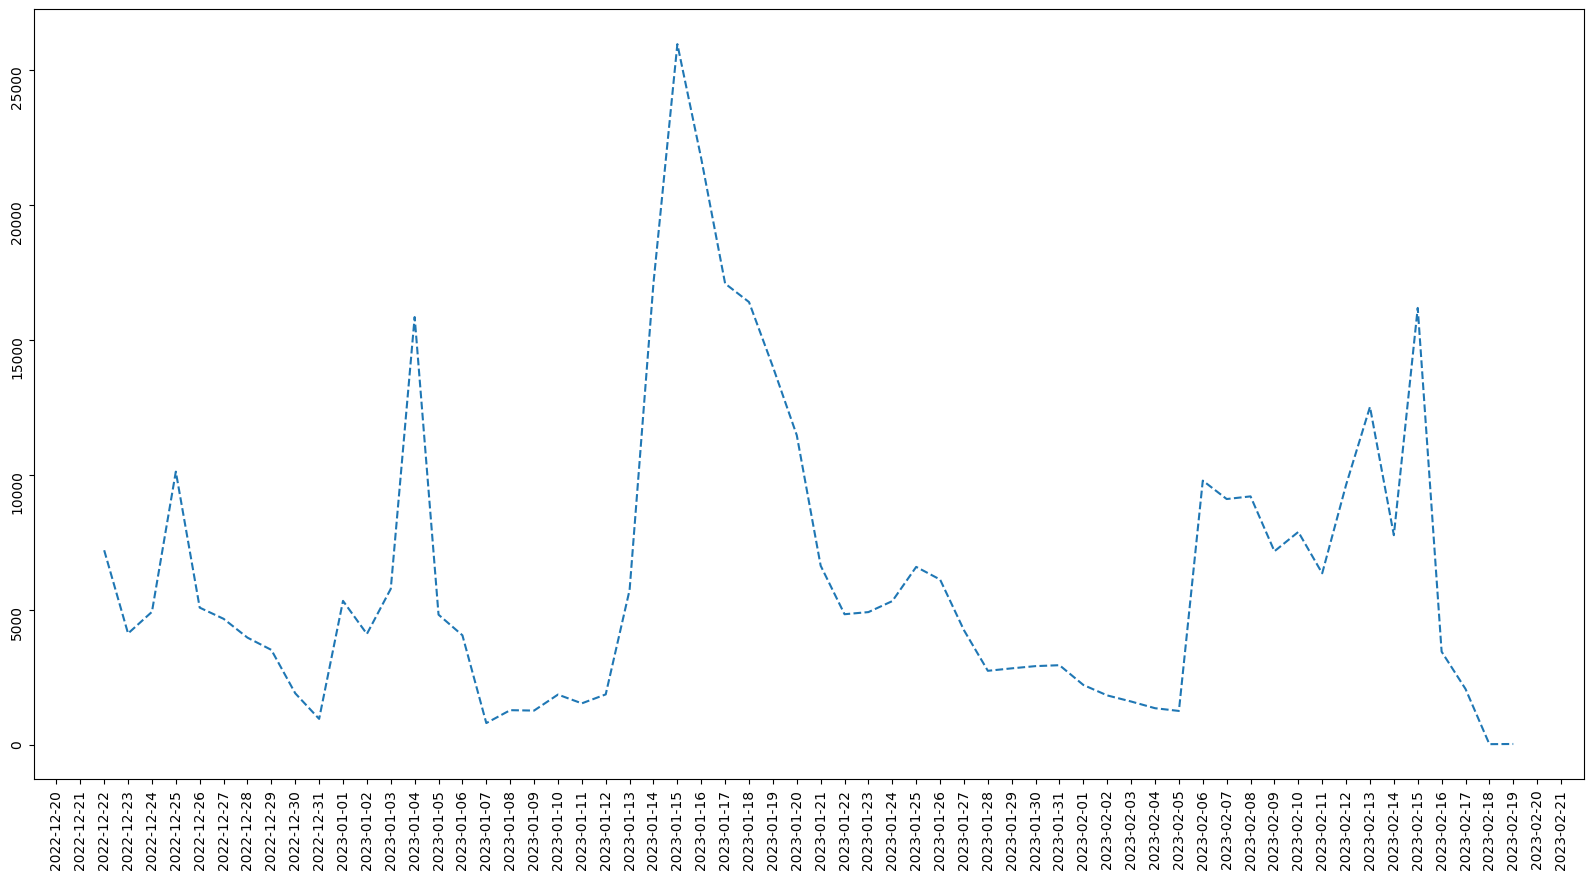

In [14]:
tweets = df_tweets.groupby(df_tweets['date'])['count'].sum()
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot_date(tweets.index, tweets.values, '--')
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.tick_params(rotation=90)
plt.show()

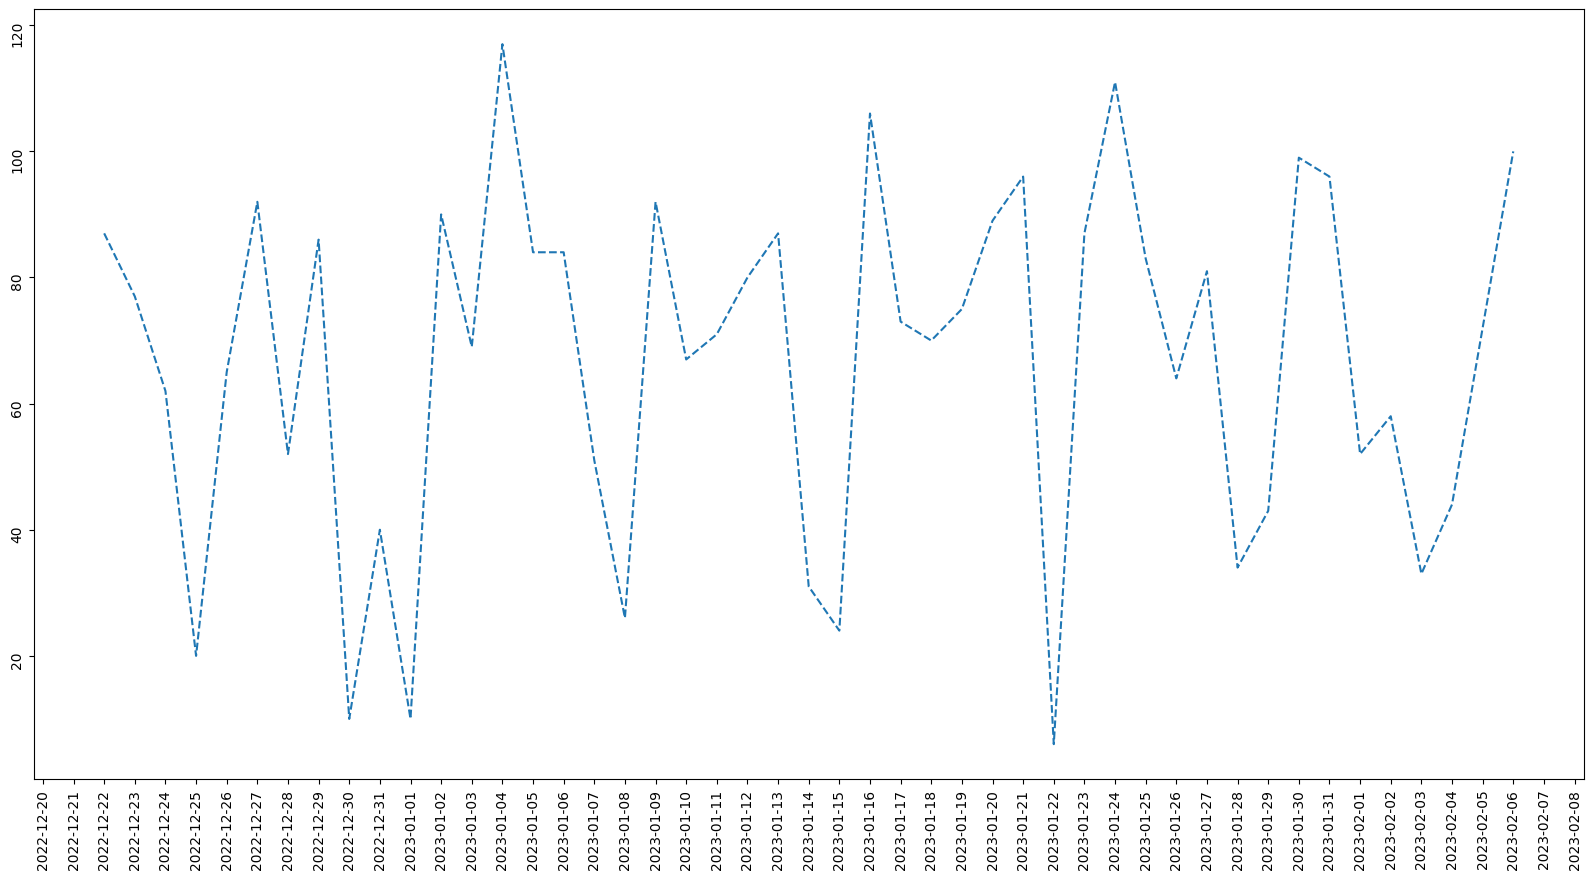

In [15]:
mynews = df_mynews.groupby(df_mynews['date'])['count'].sum()
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot_date(mynews.index, mynews.values, '--')
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.tick_params(rotation=90)
plt.show()

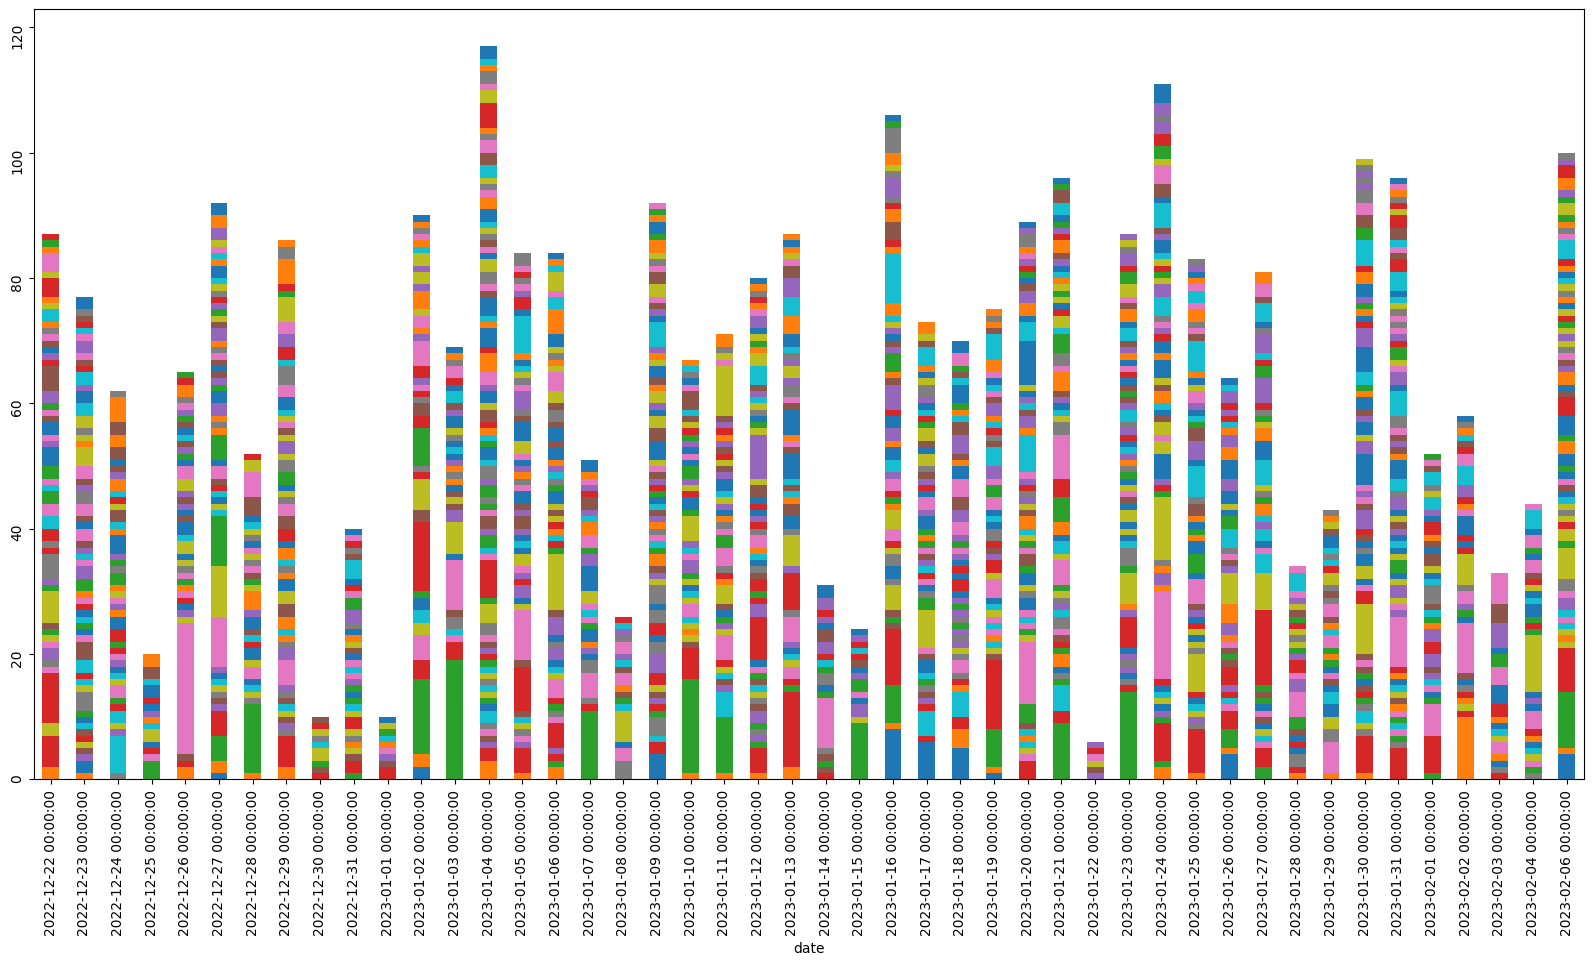

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))
df_mynews.groupby([df_mynews['date'], df_mynews['newspaper']])['count'].sum().unstack().plot.bar(stacked=True, 
                                                                                                 ax=ax, legend=False)
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.tick_params(rotation=90)
plt.show()

In [17]:
df_mynews['newspaper'].value_counts()

lavanguardia.com                    71
Agencia de noticias EUROPA PRESS    69
europapress.es                      49
elpais.com                          41
elespanol.com                       39
                                    ..
HOLA                                 1
diariodeavisos.elespanol.com         1
diariodelaltoaragon.es               1
elboletin.com                        1
atlantico.net                        1
Name: newspaper, Length: 281, dtype: int64